# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Reading in Data

In [5]:
data = pd.read_csv("../data/raw/churn_v1.csv")
data

,customer_id,gender,age,under_30,senior_citizen,married,dependents,num_dependents,location_id,country,...,total_revenue,status_id,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason
0,0002-ORFBO,Female,37,No,No,Yes,No,0,FUGQUJ6597,United States,...,974.81,UAAWUJ8685,3,Stayed,No,0,65,2205,No Churn,No Churn
1,0003-MKNFE,Male,46,No,No,No,No,0,SIZFEJ5344,United States,...,610.28,URNYXG9268,5,Stayed,No,0,66,5414,No Churn,No Churn
2,0004-TLHLJ,Male,50,No,No,No,No,0,RZDAXJ8786,United States,...,415.45,LOOUCZ6174,1,Churned,Yes,1,71,4479,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,MGKGVM9555,United States,...,1599.51,HDYLOW1467,1,Churned,Yes,1,91,3714,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,FJLSME1564,United States,...,289.54,EICWUI5128,1,Churned,Yes,1,68,3464,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,20,Yes,No,No,No,0,TQILRG3563,United States,...,1349.74,AJQHFF3167,4,Stayed,No,0,59,3161,No Churn,No Churn
7039,9992-RRAMN,Male,40,No,No,Yes,No,0,LURNCH8685,United States,...,2230.10,ZXQQXT9119,1,Churned,Yes,1,68,5248,Dissatisfaction,Product dissatisfaction
7040,9992-UJOEL,Male,22,Yes,No,No,No,0,WQKQWU2461,United States,...,129.99,UFWMVH7729,5,Joined,No,0,33,5870,No Churn,No Churn
7041,9993-LHIEB,Male,21,Yes,No,Yes,No,0,SIQQRR3964,United States,...,4769.69,FJBUFN1164,3,Stayed,No,0,59,4792,No Churn,No Churn


# Feature Engineering

Investigating base model features

In [11]:
# Columns we're working with:
df = data.copy()
drop=['customer_id', 'location_id', 'country', 'state', 'city', 'zip_code', 'lat_long', 'latitude', 'longitude',
       'population_id', 'pop', 'service_id', 'status_id', 'satisfaction_score', 'total_charges', 'total_refunds', 'total_extra_data_charges', 'total_long_distance_charges',
       'total_revenue', 'customer_status', 'churn_label', 'churn_score', 'cltv', 'churn_category', 'churn_reason']
df = df[[col for col in df.columns if col not in drop]]
df.columns

Index(['gender', 'age', 'under_30', 'senior_citizen', 'married', 'dependents',
       'num_dependents', 'referred_friend', 'num_referrals', 'tenure_months',
       'offer', 'phone_service', 'avg_monthly_long_distance_charge',
       'multiple_lines', 'internet_service', 'internet_type',
       'avg_monthly_gb_download', 'online_security', 'online_backup',
       'device_protection', 'premium_tech_support', 'streaming_tv',
       'streaming_movies', 'streaming_music', 'unlimited_data', 'contract',
       'paperless_billing', 'payment_method', 'monthly_charge', 'churn_value'],
      dtype='object')

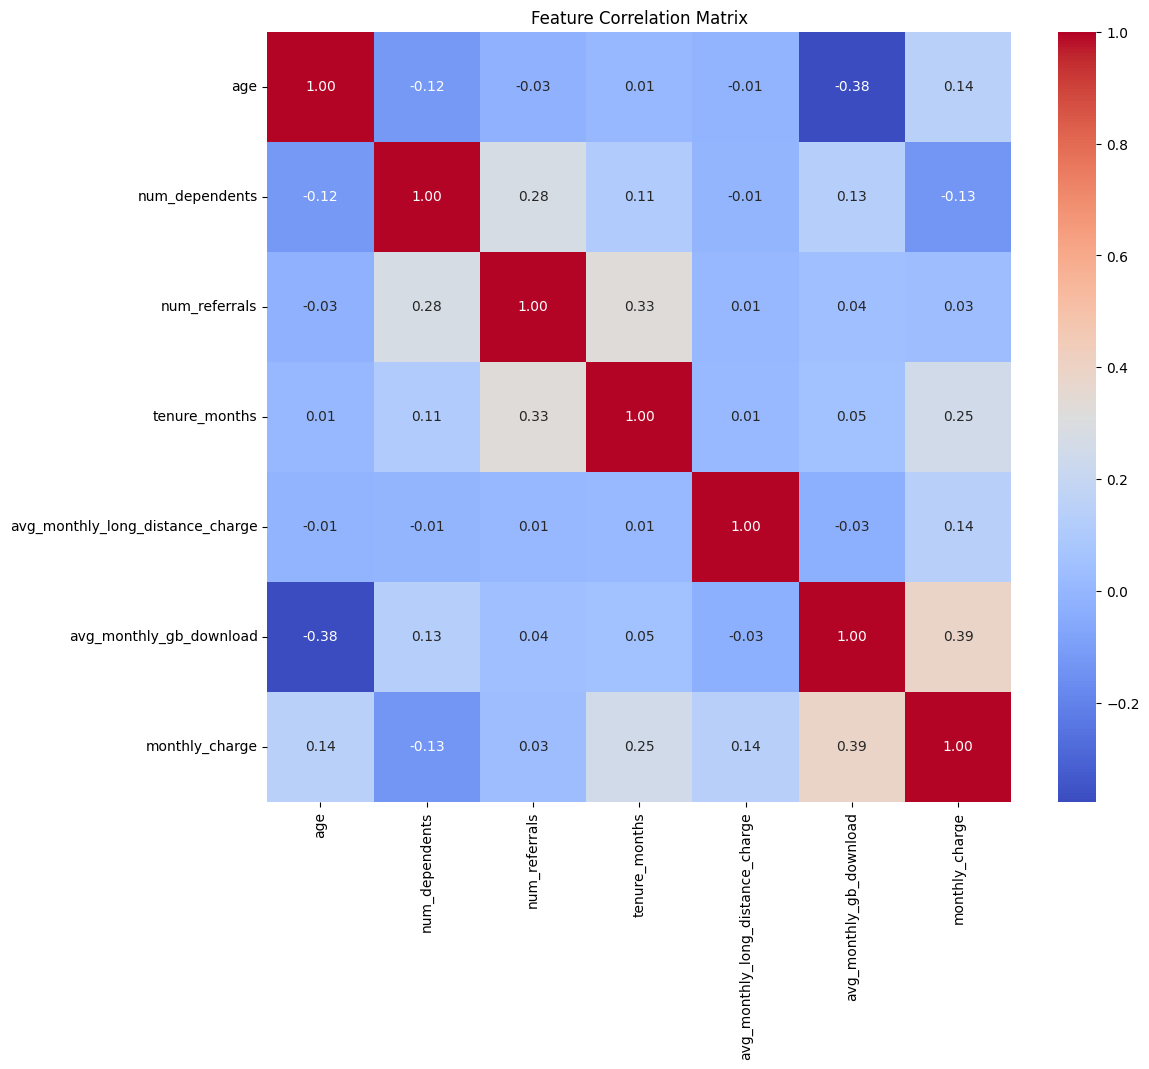

In [13]:
# Check for multicollinearity within continuous features
continuous = ['age', 'num_dependents', 'num_referrals', 'tenure_months', 'avg_monthly_long_distance_charge', 'avg_monthly_gb_download', 
                  'monthly_charge']
continuous_features_df = df[continuous]
corr = continuous_features_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()